In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
caseframe=pd.read_csv('data/case.csv', sep=';', encoding="windows-1251", thousands=",", index_col=0)
print(caseframe.info)

<bound method DataFrame.info of       case_id data_income  cristal_id  way_id data_install data_outcome  \
0    30013347  10.01.2020           1       1   20.01.2020   20.01.2020   
1    30013347  10.01.2020           1       3   27.01.2020   29.01.2020   
2    30013347  10.01.2020           1       6   01.02.2020   06.02.2020   
3    30012088  07.02.2020           1       4   09.02.2020   14.02.2020   
4    30012088  07.02.2020           1       4   16.02.2020   20.02.2020   
..        ...         ...         ...     ...          ...          ...   
196  30014825  26.07.2020          18       6   31.07.2020   04.08.2020   
197  30014825  26.07.2020          18       2   05.08.2020   09.08.2020   
198  30014825  26.07.2020          18       5   15.08.2020   17.08.2020   
199  30014818  17.08.2020          18       6   18.08.2020   21.08.2020   
200  30014818  17.08.2020          18       5   23.08.2020   26.08.2020   

      reason  metal_mass  gap  R1  r1  left  right  remark  value  

In [3]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

<AxesSubplot:>

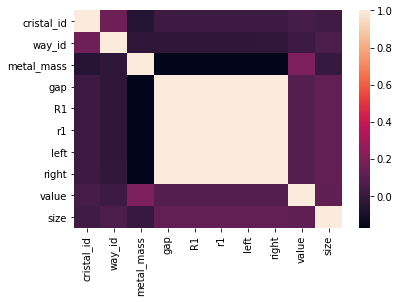

In [4]:
corr = caseframe.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
caseframe=caseframe.fillna('hz')
caseframe=MultiColumnLabelEncoder(columns = ['remark','reason']).fit_transform(caseframe)
print(caseframe.head(10))

    case_id data_income  cristal_id  way_id data_install data_outcome  reason  \
0  30013347  10.01.2020           1       1   20.01.2020   20.01.2020       5   
1  30013347  10.01.2020           1       3   27.01.2020   29.01.2020       7   
2  30013347  10.01.2020           1       6   01.02.2020   06.02.2020       7   
3  30012088  07.02.2020           1       4   09.02.2020   14.02.2020       7   
4  30012088  07.02.2020           1       4   16.02.2020   20.02.2020       7   
5  30011717  21.02.2020           1       1   22.02.2020   26.02.2020       7   
6  30011717  21.02.2020           1       3   28.02.2020   05.03.2020       7   
7  30011717  21.02.2020           1       4   08.03.2020   12.03.2020       7   
8  30011717  21.02.2020           1       1   13.03.2020   13.03.2020       7   
9  30011717  21.02.2020           1       2   22.03.2020   28.03.2020       7   

   metal_mass  gap  R1  r1  left right  remark value  size  
0           0    5   5   5     5     5       4 

<AxesSubplot:>

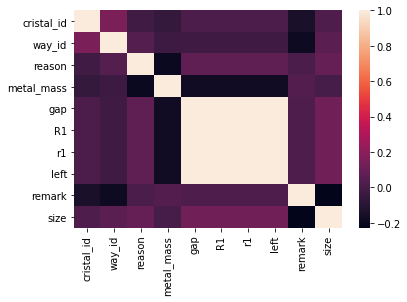

In [6]:
corr = caseframe.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
paramframe=pd.read_csv('data/param.csv', sep=';', encoding="windows-1251",skiprows = 2, thousands=",", index_col=0,header=0)
print(paramframe.head())

       Паспорт разливки плавки        Дата  Вес заготовок, т  \
№ п/п                                                          
1                     12004615  01.07.2020             16896   
2                     12004616  01.07.2020            165888   
3                     12004617  01.07.2020            165888   
4                     12004618  01.07.2020            172032   
5                     12004619  01.07.2020            156672   

      Марка стали полученная             ГОСТ  Плавка в серии  \
№ п/п                                                           
1                     Арм500  ГОСТ 34028-2016             5.0   
2                     Арм500  ГОСТ 34028-2016             6.0   
3                     Арм500  ГОСТ 34028-2016             7.0   
4                     Арм500  ГОСТ 34028-2016             8.0   
5                     Арм500  ГОСТ 34028-2016             9.0   

      Сечение заготовки Тип разливки  Вес стали (со стенда ППС), т  \
№ п/п                    

<AxesSubplot:>

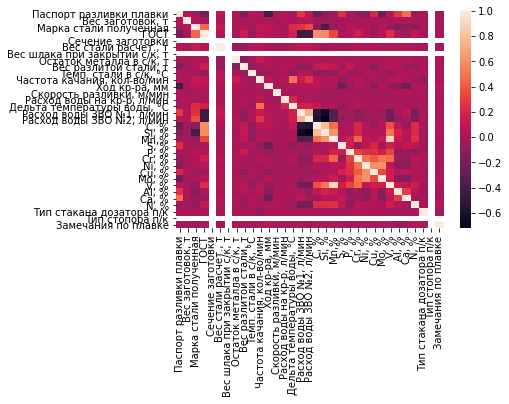

In [8]:
paramframe=paramframe.fillna('hz')
paramframe=MultiColumnLabelEncoder(columns = ['Сечение заготовки','Тип стопора п/к','Замечания по плавке','Тип стакана дозатора п/к','ГОСТ','Марка стали полученная']).fit_transform(paramframe)
corr = paramframe.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [11]:
geomframe=pd.read_csv('data/geom.csv', sep=';', encoding="windows-1251",thousands=",", index_col=0,header=0)
print(geomframe.head())
geomframe=geomframe[0:8]

             пїЅ пїЅпїЅпїЅпїЅпїЅпїЅ  пїЅ пїЅпїЅпїЅпїЅпїЅ  пїЅ пїЅпїЅпїЅ  \
пїЅ пїЅ/пїЅ                                                               
1                          12002874                    1   120028741105   
2                          12002874                    2   120028741205   
3                          12002874                    3   120028741305   
4                          12002874                    4   120028741405   
5                          12002874                    5   120028741505   

             пїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅпїЅ, пїЅпїЅ  max  min  ?   \
пїЅ пїЅ/пїЅ                                                            
1                                                    4  151  150   1   
2                                                    3  151  151   0   
3                                                    2  151  150   1   
4                                                    2  151  151   0   
5                                         